In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [30]:
data=pd.read_csv('obsmat.txt', sep='  ', header=None, names=['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y'])
groups=pd.read_csv('groups.txt',sep=' ', names=['a','b','c','d','e','f'])

In [31]:
data['group_size'] = 0
data['group_number'] = 0
groups['a']=groups['a'].astype(float)
groups['b']=groups['b'].astype(float)
groups['group_size'] =  groups.apply(lambda x: 6 - (x.isnull().sum()), axis='columns')
groups['group_number'] = range(1,len(groups)+1)
data = data.drop(['pos_z', 'v_z'], axis=1)

In [32]:
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_size'][i] = groups['group_size'][j]

            
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_number'][i] = groups['group_number'][j]

In [33]:
data['centroid_x'] = 0.0
data['centroid_y'] = 0.0


In [34]:
data.loc[data['group_number']==2]['pedestrian_ID'].unique()

array([2., 3., 6.])

In [35]:
data[data['group_size'] == 5]['group_number'].unique()

array([51, 52, 53], dtype=int64)

In [36]:
frames = data['frame_number'].unique().tolist()

In [37]:
for i in frames:
    grouped = data[data['frame_number'] == i].groupby('group_number').mean()
    grouped = grouped.reset_index()
    for j in grouped.group_number.tolist():
        data.loc[(data.frame_number == i) & (data.group_number == j),'centroid_x']=grouped[grouped['group_number'] == j]['pos_x'].item()
        data.loc[(data.frame_number == i) & (data.group_number == j),'centroid_y']=grouped[grouped['group_number'] == j]['pos_y'].item()
        data.loc[data['group_number'] == 0, 'centroid_x'] = 0
        data.loc[data['group_number'] == 0, 'centroid_y'] = 0

In [38]:
data['dist_x'] = np.abs(data['centroid_x'] - data['pos_x'])
data['dist_y'] = np.abs(data['centroid_y'] - data['pos_y'])
data.loc[data['group_number'] == 0, 'dist_x'] = 0
data.loc[data['group_number'] == 0, 'dist_y'] = 0



In [39]:
data['normalized_group_pos_x'] = data['pos_x'] - data['centroid_x']
data['normalized_group_pos_y'] = data['pos_y'] - data['centroid_y'] 
data.loc[data['group_number'] == 0, 'normalized_group_pos_x'] = np.nan
data.loc[data['group_number'] == 0, 'normalized_group_pos_y'] = np.nan

In [40]:
data.head(30)

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,group_size,group_number,centroid_x,centroid_y,dist_x,dist_y,normalized_group_pos_x,normalized_group_pos_y
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
5,804.0,2.0,13.017548,5.782591,-2.324444,-0.076606,3,2,13.017548,5.782591,0.000000,0.000000,0.000000,0.000000
6,810.0,1.0,11.731818,4.320563,1.644127,0.544391,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
7,810.0,2.0,12.087770,5.751949,-1.589052,-0.065971,3,2,12.087770,5.751949,0.000000,0.000000,0.000000,0.000000
8,816.0,1.0,12.381302,4.496793,1.623709,0.440576,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
9,816.0,2.0,11.746306,5.729815,-1.140766,0.105373,3,2,11.746306,5.729815,0.000000,0.000000,0.000000,0.000000


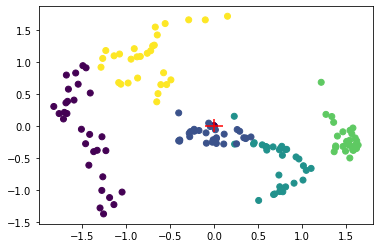

In [41]:
num = 52
plt.scatter(data[data['group_number'] == num]['normalized_group_pos_y'],data[data['group_number'] == num]['normalized_group_pos_x'],c = data[data['group_number'] == num]['pedestrian_ID'])
plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')

plt.show()

In [42]:
group_size = 2

df_of_group = data[data['group_size'] == group_size]

frames_of_group = df_of_group['frame_number'].unique().tolist()
others_than_group = data[(data['frame_number'].isin(frames_of_group)) & (data['group_size'] != group_size)]


In [45]:

def people_around_group(num):
    frames = data[data['group_number'] == num]['frame_number'].unique().tolist()
    xpoints = data[data['group_number'] == num]['normalized_group_pos_x']
    ypoints = data[data['group_number'] == num]['normalized_group_pos_y']
    df = data[(data['frame_number'].isin(frames)) & (data['group_number'] != num)]
    df['points_x'] = np.nan
    df['points_y'] = np.nan
    points_x = []
    points_y = []
    for i in frames:
        x = data[(data['frame_number'] == i) & (data['group_number']==num)]['centroid_x'].tolist()
        y = data[(data['frame_number'] == i) & (data['group_number']==num)]['centroid_y'].tolist()
        points_x.append(k - x[0] for k in df[df['frame_number'] == i]['pos_x'].tolist())
        points_y.append(k - y[0] for k in df[df['frame_number'] == i]['pos_y'].tolist() )
    df['points_x'] = points_x
    df['points_y'] = points_y
    plt.scatter(data[data['group_number'] == num]['normalized_group_pos_y'],data[data['group_number'] == num]['normalized_group_pos_x'])
    plt.scatter(df['points_y'],df['points_x'], c='blue')

In [46]:
people_around_group(2)

ValueError: Length of values (37) does not match length of index (80)

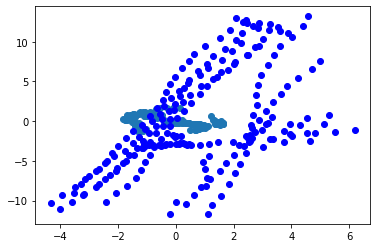

In [57]:
    frames = data[data['group_number'] == num]['frame_number'].unique().tolist()
    xpoints = data[data['group_number'] == num]['normalized_group_pos_x']
    ypoints = data[data['group_number'] == num]['normalized_group_pos_y']
    df = data[(data['frame_number'].isin(frames)) & (data['group_number'] != num)]
    df['points_x'] = np.nan
    df['points_y'] = np.nan
    points_x = []
    points_y = []
    for i in frames:
        x = data[(data['frame_number'] == i) & (data['group_number']==num)]['centroid_x'].unique().tolist()
        
        y = data[(data['frame_number'] == i) & (data['group_number']==num)]['centroid_y'].unique().tolist()
        normalized_points_x = [k - x[0] for k in df[df['frame_number'] == i]['pos_x'].tolist()] 
        normalized_points_y = [k - y[0] for k in df[df['frame_number'] == i]['pos_y'].tolist()] 
        points_x.append(normalized_points_x )
        points_y.append(normalized_points_y )
    flat_points_x = [item for sublist in points_x for item in sublist]
    flat_points_y = [item for sublist in points_y for item in sublist]
    df['points_x'] = flat_points_x
    df['points_y'] = flat_points_y
    plt.scatter(data[data['group_number'] == num]['normalized_group_pos_y'],data[data['group_number'] == num]['normalized_group_pos_x'])
    plt.scatter(df['points_y'],df['points_x'], c='blue')

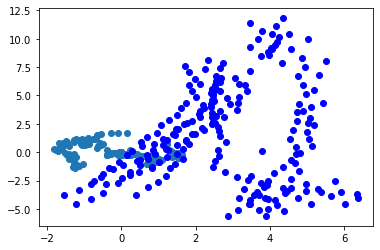

In [59]:
    frames = data[data['group_number'] == num]['frame_number'].unique().tolist()
    xpoints = data[data['group_number'] == num]['normalized_group_pos_x']
    ypoints = data[data['group_number'] == num]['normalized_group_pos_y']
    df = data[(data['frame_number'].isin(frames)) & (data['group_number'] != num)]
    df['points_x'] = np.nan
    df['points_y'] = np.nan
    points_x = []
    points_y = []
    for i in frames:
        max_x = np.abs(data[data['frame_number'] == i]['dist_x']).max()

        max_y = np.abs(data[data['frame_number'] == i]['dist_y']).max()
        normalized_points_x = [k - max_x for k in df[df['frame_number'] == i]['pos_x'].tolist()] 
        normalized_points_y = [k - max_y for k in df[df['frame_number'] == i]['pos_y'].tolist()] 
        points_x.append(normalized_points_x )
        points_y.append(normalized_points_y )
    flat_points_x = [item for sublist in points_x for item in sublist]
    flat_points_y = [item for sublist in points_y for item in sublist]
    df['points_x'] = flat_points_x
    df['points_y'] = flat_points_y
    plt.scatter(data[data['group_number'] == num]['normalized_group_pos_y'],data[data['group_number'] == num]['normalized_group_pos_x'])
    plt.scatter(df['points_y'],df['points_x'], c='blue')